# INTRODUCTION

### Acknowledgement

### Objectives of this notebook

### The machine learning models used in this dataset are:

### Explanation of the variables of the dataset:

## IMPORTING THE NECESSARY MODULES

In [1]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import os

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
#from statsmodels.tools import add_constant
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler 
from sklearn import metrics
import joblib

# DATA PREPARATION

## 1 | Reading the data set

In [2]:
df = pd.read_csv('input/Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


## 2 | Summary Of Numerical Features

In [3]:
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
Age,270.000000,54.433333,9.109067,29.000000,48.000000,55.000000,61.000000,77.000000
Sex,270.000000,0.677778,0.468195,0.000000,0.000000,1.000000,1.000000,1.000000
Chest pain type,270.000000,3.174074,0.950090,1.000000,3.000000,3.000000,4.000000,4.000000
BP,270.000000,131.344444,17.861608,94.000000,120.000000,130.000000,140.000000,200.000000
Cholesterol,270.000000,249.659259,51.686237,126.000000,213.000000,245.000000,280.000000,564.000000
FBS over 120,270.000000,0.148148,0.355906,0.000000,0.000000,0.000000,0.000000,1.000000
EKG results,270.000000,1.022222,0.997891,0.000000,0.000000,2.000000,2.000000,2.000000
Max HR,270.000000,149.677778,23.165717,71.000000,133.000000,153.500000,166.000000,202.000000
Exercise angina,270.000000,0.329630,0.470952,0.000000,0.000000,0.000000,1.000000,1.000000
ST depression,270.000000,1.050000,1.145210,0.000000,0.000000,0.800000,1.600000,6.200000


## 3 | Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
df.nunique()

Age                         41
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64

In [6]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [7]:
df =  df[df.columns].replace({'Presence':1, 'Absence':0 })
df['Heart Disease'] = df['Heart Disease'].astype(int)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    int32  
dtypes: float64(1), int32(1), i

# EXPLORATORY ANALYSIS

## 1 | Visualization Of Categorical Features

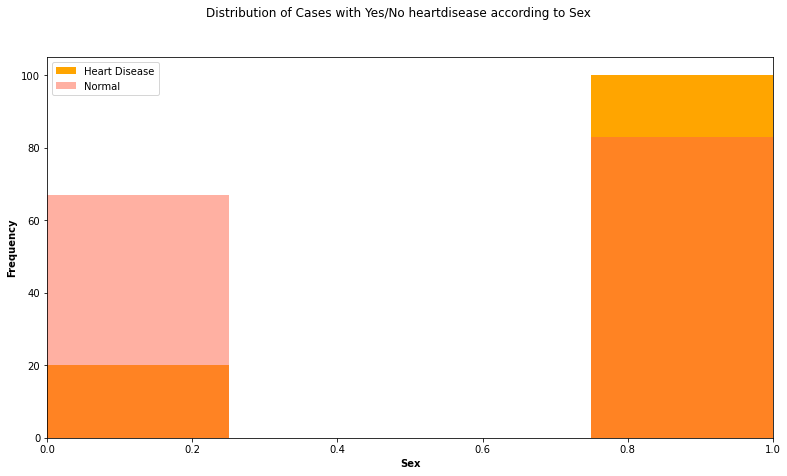

In [9]:
fig, ax = plt.subplots(figsize = (13,7))

ax.hist(df[df["Heart Disease"]==1]["Sex"], bins=4, alpha=1, color="orange", label="Heart Disease")
ax.hist(df[df["Heart Disease"]==0]["Sex"], bins=4, alpha=0.5, color="tomato", label="Normal")

ax.set_xlim(0, 1)
ax.set_xlabel("Sex", fontweight ='bold')
ax.set_ylabel("Frequency", fontweight ='bold')

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to Sex")

ax.legend();

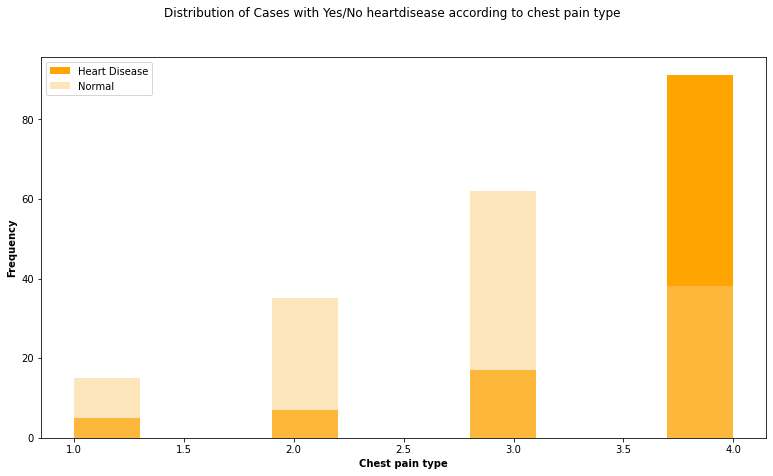

In [10]:
fig, ax = plt.subplots(figsize = (13,7))

ax.hist(df[df["Heart Disease"]==1]["Chest pain type"], bins=10, alpha=1, color="orange", label="Heart Disease")
ax.hist(df[df["Heart Disease"]==0]["Chest pain type"], bins=10, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Chest pain type", fontweight ='bold')
ax.set_ylabel("Frequency", fontweight ='bold')

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to chest pain type")

ax.legend();

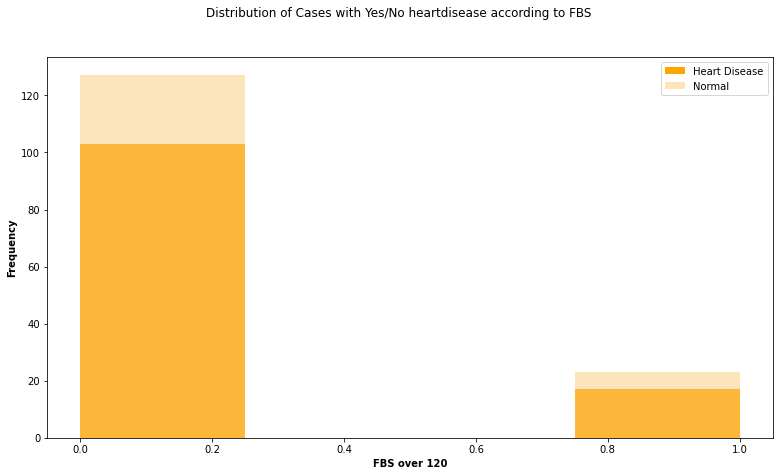

In [11]:
fig, ax = plt.subplots(figsize = (13,7))

ax.hist(df[df["Heart Disease"]==1]["FBS over 120"], bins=4, alpha=1, color="orange", label="Heart Disease")
ax.hist(df[df["Heart Disease"]==0]["FBS over 120"], bins=4, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("FBS over 120", fontweight ='bold')
ax.set_ylabel("Frequency", fontweight ='bold')

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to FBS")

ax.legend();

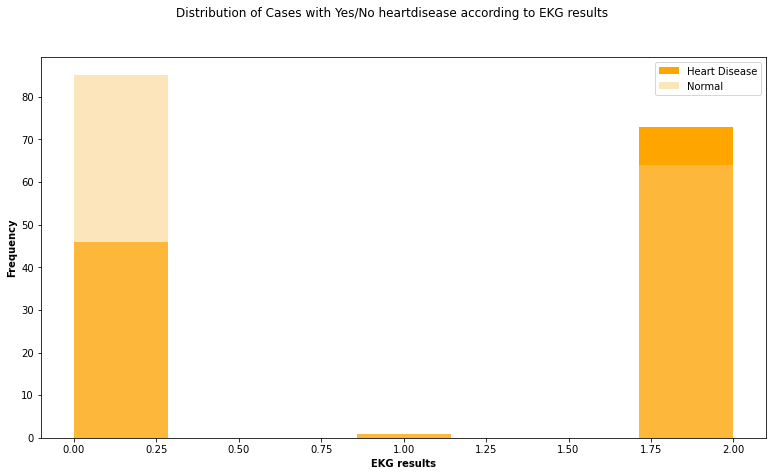

In [12]:
fig, ax = plt.subplots(figsize = (13,7))

ax.hist(df[df["Heart Disease"]==1]["EKG results"], bins=7, alpha=1, color="orange", label="Heart Disease")
ax.hist(df[df["Heart Disease"]==0]["EKG results"], bins=7, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("EKG results", fontweight ='bold')
ax.set_ylabel("Frequency", fontweight ='bold')

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to EKG results")

ax.legend();

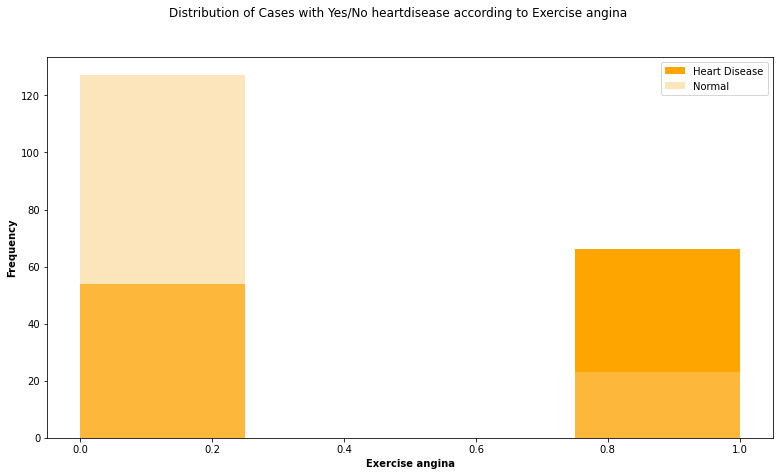

In [13]:
fig, ax = plt.subplots(figsize = (13,7))

ax.hist(df[df["Heart Disease"]==1]["Exercise angina"], bins=4, alpha=1, color="orange", label="Heart Disease")
ax.hist(df[df["Heart Disease"]==0]["Exercise angina"], bins=4, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Exercise angina", fontweight ='bold')
ax.set_ylabel("Frequency", fontweight ='bold')

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to Exercise angina")

ax.legend();

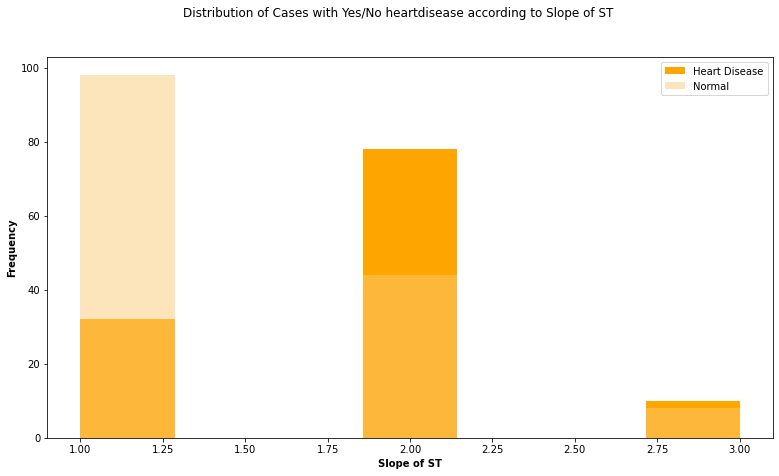

In [14]:
fig, ax = plt.subplots(figsize = (13,7))

ax.hist(df[df["Heart Disease"]==1]["Slope of ST"], bins=7, alpha=1, color="orange", label="Heart Disease")
ax.hist(df[df["Heart Disease"]==0]["Slope of ST"], bins=7, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Slope of ST", fontweight ='bold')
ax.set_ylabel("Frequency", fontweight ='bold')

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to Slope of ST")

ax.legend();

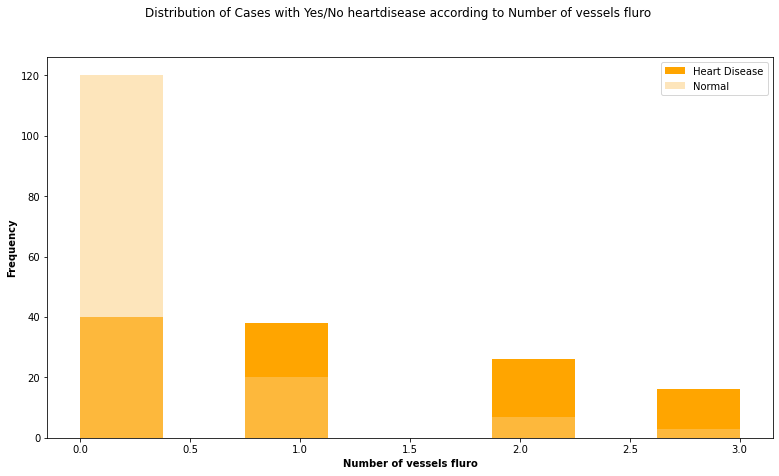

In [15]:
fig, ax = plt.subplots(figsize = (13,7))

ax.hist(df[df["Heart Disease"]==1]["Number of vessels fluro"], bins=8, alpha=1, color="orange", label="Heart Disease")
ax.hist(df[df["Heart Disease"]==0]["Number of vessels fluro"], bins=8, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Number of vessels fluro", fontweight ='bold')
ax.set_ylabel("Frequency", fontweight ='bold')

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to Number of vessels fluro")

ax.legend();

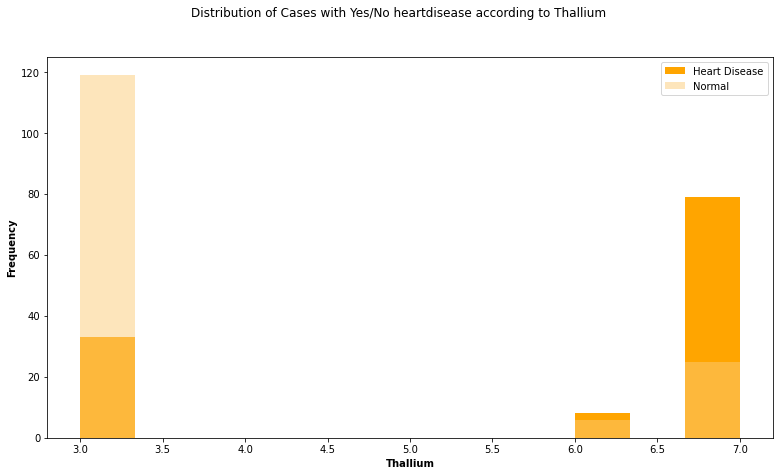

In [16]:
fig, ax = plt.subplots(figsize = (13,7))

ax.hist(df[df["Heart Disease"]==1]["Thallium"], bins=12, alpha=1, color="orange", label="Heart Disease")
ax.hist(df[df["Heart Disease"]==0]["Thallium"], bins=12, alpha=0.5, color="#fccc79", label="Normal")

ax.set_xlabel("Thallium", fontweight ='bold')
ax.set_ylabel("Frequency", fontweight ='bold')

fig.suptitle("Distribution of Cases with Yes/No heartdisease according to Thallium")

ax.legend();

## 2 | Visualization Of Numerical Features

<AxesSubplot:>

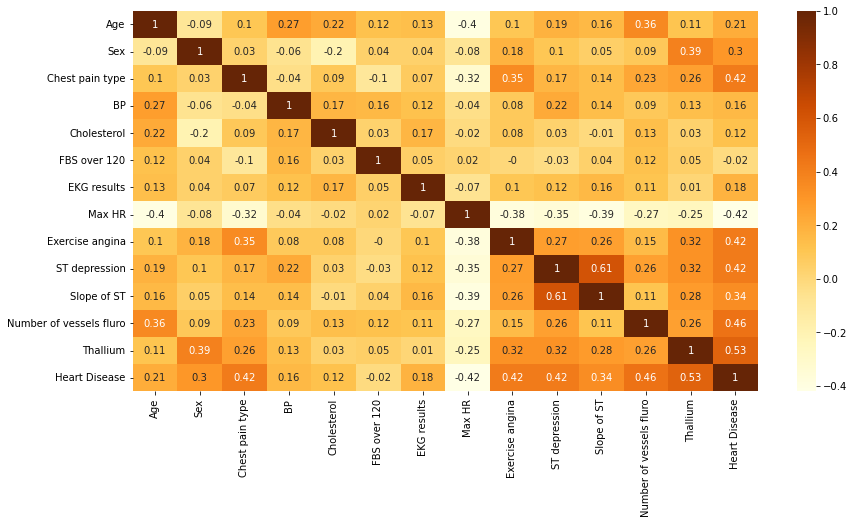

In [17]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

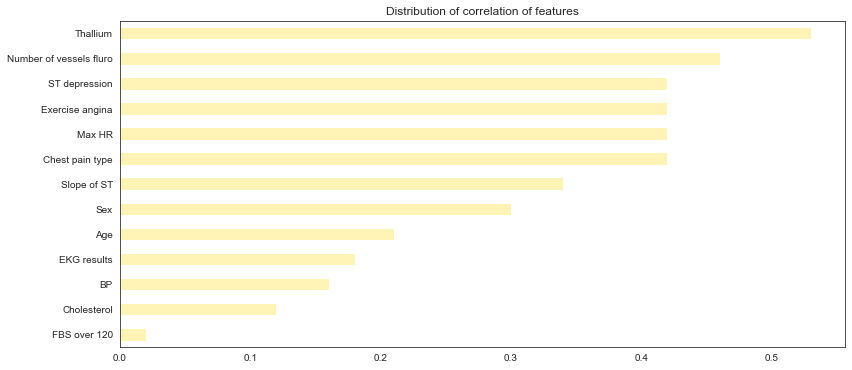

In [18]:
sns.set_style('white')
sns.set_palette('YlOrBr')
plt.figure(figsize = (13,6))
plt.title('Distribution of correlation of features')
abs(correlation['Heart Disease']).sort_values()[:-1].plot.barh()
plt.show()

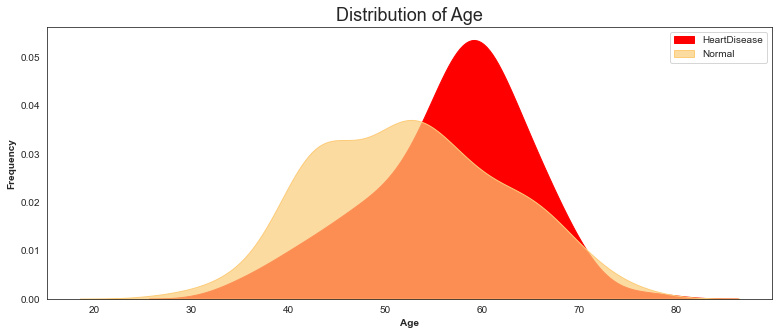

In [19]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["Heart Disease"]==1]["Age"], alpha=1,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["Heart Disease"]==0]["Age"], alpha=0.7,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Age', fontsize = 18)
ax.set_xlabel("Age", fontweight ='bold')
ax.set_ylabel("Frequency", fontweight ='bold')
ax.legend();
plt.show()

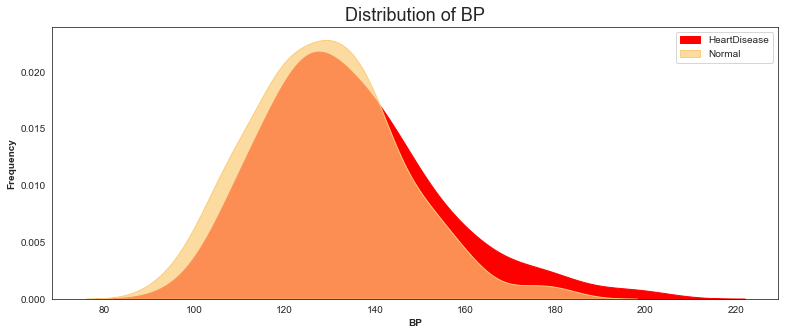

In [20]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["Heart Disease"]==1]["BP"], alpha=1,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["Heart Disease"]==0]["BP"], alpha=0.7,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of BP', fontsize = 18)
ax.set_xlabel("BP", fontweight ='bold')
ax.set_ylabel("Frequency", fontweight ='bold')
ax.legend();
plt.show()

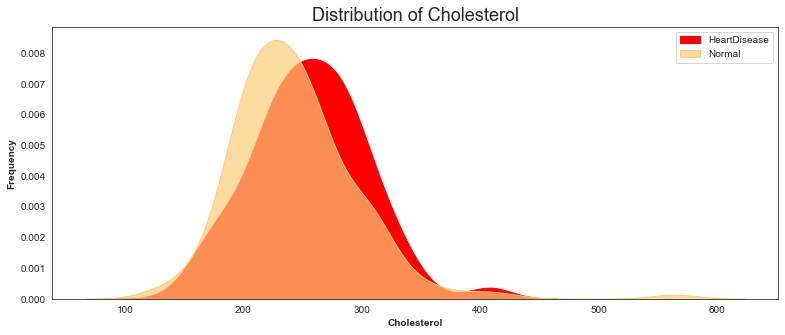

In [21]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["Heart Disease"]==1]["Cholesterol"], alpha=1,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["Heart Disease"]==0]["Cholesterol"], alpha=0.7,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Cholesterol', fontsize = 18)
ax.set_xlabel("Cholesterol", fontweight ='bold')
ax.set_ylabel("Frequency", fontweight ='bold')
ax.legend();
plt.show()

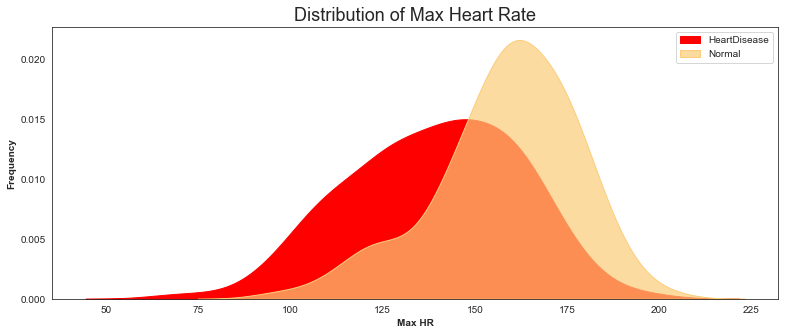

In [22]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["Heart Disease"]==1]["Max HR"], alpha=1,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["Heart Disease"]==0]["Max HR"], alpha=0.7,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of Max Heart Rate', fontsize = 18)
ax.set_xlabel("Max HR", fontweight ='bold')
ax.set_ylabel("Frequency", fontweight ='bold')
ax.legend();
plt.show()

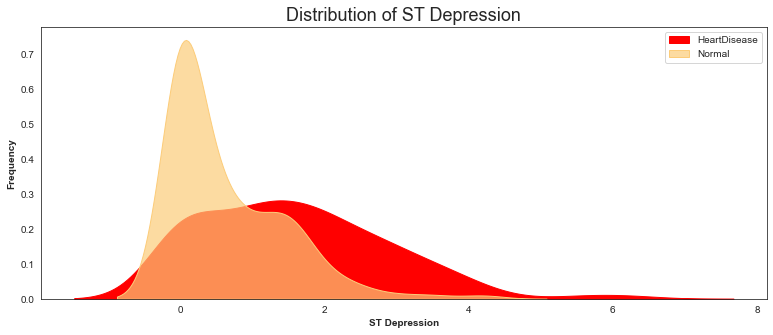

In [23]:
fig, ax = plt.subplots(figsize = (13,5))
sns.kdeplot(df[df["Heart Disease"]==1]["ST depression"], alpha=1,shade = True, color="red", label="HeartDisease", ax = ax)
sns.kdeplot(df[df["Heart Disease"]==0]["ST depression"], alpha=0.7,shade = True, color="#fccc79", label="Normal", ax = ax)
plt.title('Distribution of ST Depression', fontsize = 18)
ax.set_xlabel("ST Depression", fontweight ='bold')
ax.set_ylabel("Frequency", fontweight ='bold')
ax.legend();
plt.show()

In [24]:
getattr(df, 'Heart Disease').value_counts()

0    150
1    120
Name: Heart Disease, dtype: int64

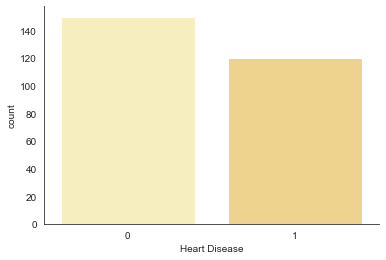

In [25]:
sns.countplot(x='Heart Disease', data=df)
sns.despine()

# SPLITTING DATASET FOR TRAINING & TESTING

In [26]:
features = df.drop(columns =['Heart Disease'], axis = 1)

#Selecting Target 
target = df['Heart Disease']

# Setting Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, shuffle = True, test_size = .2, random_state = 4)

print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (216, 13)
Shape of testing feature: (54, 13)
Shape of training label: (216,)
Shape of training label: (54,)


# DATA PREPROCESSING

## 1 | Encoding

In [27]:
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['Chest pain type', 'EKG results', 'Slope of ST', 'Number of vessels fluro', 'Thallium']),
    remainder='passthrough')

# Encode training data 
transformed_train = transformer.fit_transform(X_train)
transformed_train_data = pd.DataFrame(transformed_train, columns=transformer.get_feature_names())

# Concat the two tables
transformed_train_data.reset_index(drop=True, inplace=True)
X_train.reset_index(drop=True, inplace=True)
#X_train = pd.concat([transformed_train_data, X_train], axis=1)
X_train = transformed_train_data

# Remove old columns
#X_train.drop(['Chest pain type', 'EKG results', 'Slope of ST', 'Number of vessels fluro', 'Thallium'], axis = 1, inplace = True)



# Encode test data 
transformed_test = transformer.fit_transform(X_test)
transformed_test_data = pd.DataFrame(transformed_test, columns=transformer.get_feature_names())

# Concat the two tables
transformed_test_data.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
#X_test = pd.concat([transformed_test_data, X_test], axis=1)
X_test = transformed_test_data


# Remove old columns
#X_test.drop(['Chest pain type', 'EKG results', 'Slope of ST', 'Number of vessels fluro', 'Thallium'], axis = 1, inplace = True)

In [28]:
print('Shape of testing feature:', X_test.shape)

Shape of testing feature: (54, 25)


In [29]:
X_test.columns.values

array(['onehotencoder__x0_1', 'onehotencoder__x0_2',
       'onehotencoder__x0_3', 'onehotencoder__x0_4',
       'onehotencoder__x1_0', 'onehotencoder__x1_1',
       'onehotencoder__x1_2', 'onehotencoder__x2_1',
       'onehotencoder__x2_2', 'onehotencoder__x2_3',
       'onehotencoder__x3_0', 'onehotencoder__x3_1',
       'onehotencoder__x3_2', 'onehotencoder__x3_3',
       'onehotencoder__x4_3', 'onehotencoder__x4_6',
       'onehotencoder__x4_7', 'Age', 'Sex', 'BP', 'Cholesterol',
       'FBS over 120', 'Max HR', 'Exercise angina', 'ST depression'],
      dtype=object)

## 2 | Standardization

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1)).fit(X_train)

# Scale training data
X_train = scaler.fit_transform(X_train)

# Scale test data
X_test = scaler.fit_transform(X_test)

In [31]:
print('Shape of testing feature:', X_test.shape)

Shape of testing feature: (54, 25)


In [32]:
X_test

array([[-1.        ,  1.        , -1.        , ...,  0.48387097,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ...,  0.51612903,
         1.        , -0.44444444],
       [ 1.        , -1.        , -1.        , ...,  0.61290323,
        -1.        , -0.5       ],
       ...,
       [ 1.        , -1.        , -1.        , ...,  0.19354839,
        -1.        ,  0.44444444],
       [-1.        , -1.        ,  1.        , ...,  0.74193548,
         1.        , -0.77777778],
       [-1.        , -1.        , -1.        , ...,  0.41935484,
        -1.        , -1.        ]])

# MODELLING

In [33]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

## 1 | Building Model

In [34]:
X_test

array([[-1.        ,  1.        , -1.        , ...,  0.48387097,
        -1.        , -1.        ],
       [-1.        , -1.        , -1.        , ...,  0.51612903,
         1.        , -0.44444444],
       [ 1.        , -1.        , -1.        , ...,  0.61290323,
        -1.        , -0.5       ],
       ...,
       [ 1.        , -1.        , -1.        , ...,  0.19354839,
        -1.        ,  0.44444444],
       [-1.        , -1.        ,  1.        , ...,  0.74193548,
         1.        , -0.77777778],
       [-1.        , -1.        , -1.        , ...,  0.41935484,
        -1.        , -1.        ]])

### Logistic regression

In [35]:
from statsmodels.tools import add_constant
df_constant = add_constant(df)
df_constant.head()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,1.0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,1.0,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,1.0,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,1.0,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,1.0,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [36]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
#from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
lr = LogisticRegression(C=1.0, random_state=1)
#
# Number of features
#
k_features = 10
#
# Instantiate SequentialBackwardSearch
#
sfs = SFS(lr, k_features)
#
# Fit the data to determine the k_features which give the
# most optimal model performance
#
sfs.fit(X_train, y_train)
#
# Transform the training data set to dataset having k_features
# giving most optimal model performance
#
X_train_sfs = sfs.transform(X_train)
#
# Transform the test data set to dataset having k_features
#
X_test_sfs = sfs.transform(X_test)


In [37]:
model=sm.Logit(np.asarray(y_train),np.asarray(X_train_sfs))
result=model.fit()
joblib.dump(model, 'assets/model/logi_regressionDet.sav')
result.summary()

         Current function value: 0.305687
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  216
Model:                          Logit   Df Residuals:                      206
Method:                           MLE   Df Model:                            9
Date:                Fri, 12 May 2023   Pseudo R-squ.:                  0.5519
Time:                        12:16:33   Log-Likelihood:                -66.028
converged:                      False   LL-Null:                       -147.34
Covariance Type:            nonrobust   LLR p-value:                 2.115e-30
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             4.3863   3.85e+04      0.000      1.000   -7.55e+04    7.55e+04
x2             4.8795   3.85e+04      0.000      1.000   -7.55e+04    7.55e+04
x3             4.6595   3.85e+04      0.000      1.000   -7.55e+04    7.55e+04
x4             5.6213   3.85e+04      0.000      1.000   -7.55e+04    7.55e+04
x5           -10.3881   7.71e+04     -0.000      1.000   -1.51e+05    1.51e+05
x6            -0.4218      0.253     -1.668      0.095      -0.917       0.074
x7            -0.9147      0.236     -3.883      0.000      -1.376      -0.453
x8            -1.0599      0.231     -4.586      0.000      -1.513      -0.607
x9             0.6177      0.244      2.535      0.011       0.140       1.095
x10            1.7135      0.796      2.153      0.031       0.154       3.273
==============================================================================
"""

### Decision Tree

In [38]:
# Building Decision Tree model 

clf = tree.DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

#filename = 'finalized_model.sav'
joblib.dump(clf, 'assets/model/decision_treeDet.sav')
# Evaluating Model
clf_eval = evaluate_model(clf, X_test, y_test)

# Print result
print('Accuracy:', clf_eval['acc'])
print('Precision:', clf_eval['prec'])
print('Recall:', clf_eval['rec'])
print('F1 Score:', clf_eval['f1'])
print('Cohens Kappa Score:', clf_eval['kappa'])
print('Area Under Curve:', clf_eval['auc'])
print('Confusion Matrix:\n', clf_eval['cm'])# Evaluate Model

Accuracy: 0.7037037037037037
Precision: 0.7307692307692307
Recall: 0.6785714285714286
F1 Score: 0.7037037037037038
Cohens Kappa Score: 0.40821917808219177
Area Under Curve: 0.7046703296703297
Confusion Matrix:
 [[19  7]
 [ 9 19]]


<AxesSubplot:>

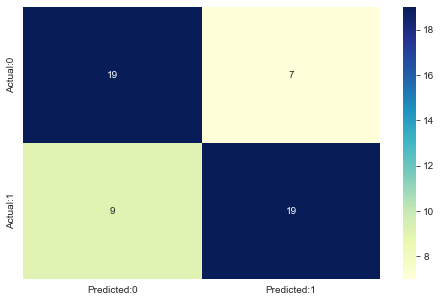

In [39]:
cm = clf_eval['cm']
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### K-Nearest Neighbors

In [40]:
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, y_train)

joblib.dump(clf, 'assets/model/KNNDet.sav')

# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.7037037037037037
Precision: 0.8
Recall: 0.5714285714285714
F1 Score: 0.6666666666666666
Cohens Kappa Score: 0.4130434782608696
Area Under Curve: 0.8585164835164836
Confusion Matrix:
 [[22  4]
 [12 16]]


<AxesSubplot:>

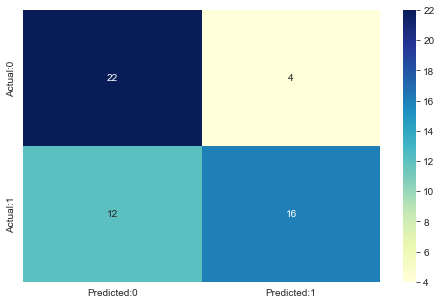

In [41]:
cm = knn_eval['cm']
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

## predicting using new data

In [42]:
#Loading the saved model with joblib
pipe = joblib.load('assets/model/decision_treeDet.sav')

# New data to predict
pr = pd.read_csv('input/set_to_predict.csv')

### Encoding the data

In [49]:
X = pr
transformer = make_column_transformer(
    (OneHotEncoder(sparse=False), ['Chest pain type', 'EKG results', 'Slope of ST', 'Number of vessels fluro', 'Thallium']),
    remainder='passthrough')

# Encode test data 
transformed_test = transformer.fit_transform(X)
transformed_test_data = pd.DataFrame(transformed_test, columns=transformer.get_feature_names())

# Concat the two tables
transformed_test_data.reset_index(drop=True, inplace=True)
X.reset_index(drop=True, inplace=True)
#X = pd.concat([transformed_test_data, X], axis=1)
X = transformed_test_data

# Remove old columns
#X.drop(['Chest pain type', 'EKG results', 'Slope of ST', 'Number of vessels fluro', 'Thallium'], axis = 1, inplace = True)

In [50]:
X.columns.values

array(['onehotencoder__x0_1', 'onehotencoder__x0_2',
       'onehotencoder__x0_3', 'onehotencoder__x0_4',
       'onehotencoder__x1_0', 'onehotencoder__x1_1',
       'onehotencoder__x1_2', 'onehotencoder__x2_1',
       'onehotencoder__x2_2', 'onehotencoder__x2_3',
       'onehotencoder__x3_0', 'onehotencoder__x3_1',
       'onehotencoder__x3_2', 'onehotencoder__x3_3',
       'onehotencoder__x4_3', 'onehotencoder__x4_6',
       'onehotencoder__x4_7', 'Age', 'Sex', 'BP', 'Cholesterol',
       'FBS over 120', 'Max HR', 'Exercise angina', 'ST depression'],
      dtype=object)

In [51]:
X

,onehotencoder__x0_1,onehotencoder__x0_2,onehotencoder__x0_3,onehotencoder__x0_4,onehotencoder__x1_0,onehotencoder__x1_1,onehotencoder__x1_2,onehotencoder__x2_1,onehotencoder__x2_2,onehotencoder__x2_3,...,onehotencoder__x4_6,onehotencoder__x4_7,Age,Sex,BP,Cholesterol,FBS over 120,Max HR,Exercise angina,ST depression
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,70.0,1.0,130.0,322.0,0.0,109.0,0.0,2.4
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,67.0,0.0,115.0,564.0,0.0,160.0,0.0,1.6
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,57.0,1.0,124.0,261.0,0.0,141.0,0.0,0.3
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,64.0,1.0,128.0,263.0,0.0,105.0,1.0,0.2
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,74.0,0.0,120.0,269.0,0.0,121.0,1.0,0.2
5,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,65.0,1.0,120.0,177.0,0.0,140.0,0.0,0.4
6,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,56.0,1.0,130.0,256.0,1.0,142.0,1.0,0.6
7,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,59.0,1.0,110.0,239.0,0.0,142.0,1.0,1.2
8,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,60.0,1.0,140.0,293.0,0.0,170.0,0.0,1.2
9,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,76.0,0.0,140.0,197.0,0.0,116.0,0.0,1.1


In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1)).fit(X)

# Scale test data
X = scaler.fit_transform(X)

In [53]:
print('Shape of testing feature:', X.shape)

Shape of testing feature: (13, 25)


In [54]:
pred_cols = list(X[-1])

# apply the whole pipeline to data
pred = pipe.predict(X[[-1]])
print(pred)

[1]


In [72]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [73]:
pipe = joblib.load('assets/model/decision_treeDet.sav')
sheet_id = "17f2EVE10PNwfjAqZHgcv86qTz15xA2SeNgKaHHCrzoo"
sheet_name = "Form Responses 1"
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"
url = url.replace(" ", "%20")
X = pd.read_csv(url)
X = X.rename(columns={'Enter Your Age ': 'Age', 'Chest Pain Type' : 'ChestPain', 'Blood Pressure (in mm Hg)':'BP', 'Cholestrol (in mg/dl)' : 'Cholesterol', 'Fasting Blood Sugar (FBS)' : 'FBS120', 'Resting Electrocardiogram result' : 'RES', 'Maximum Heart Rate ' : 'MaxHeart', 'Exercise Angina' : 'ExerAngina', ' ST depression induced by exercise compared to rest' : 'STDepression', 'Slope of ST' : 'SlopeST', 'Number of Vessels Fluro' : 'NumVesselFluro', 'Thallium ':'Thallium'})
X = X[X.columns].replace({'Yes':1, 'No':0, 'Male':1, 'Female':0, 'Other':1, 'Typical Agina':1, 'Atypical Agina':2, 'Non-Anginal Pain': 3, 'Asymptomatic': 4, 'Normal': 0, 'Having ST - T wave abnormally': 1, 'Showing probable': 2, 'Unsloping': 1, 'Flat': 2, 'Downsloping': 3, '3 : Normal' : 3, '6 : Fixed Defect': 6, '7 : Reversable Defect': 7, '0': 1, '1':1, '2':2, '3':3})
X = X.drop(['Timestamp'], axis=1)    
X

,Age,Gender,ChestPain,BP,Cholesterol,FBS120,RES,MaxHeart,ExerAngina,STDepression,SlopeST,NumVesselFluro,Thallium
0,21,1,1,90,80,1,0,84,1,1.5,1,1,3
1,120,1,1,120,76,1,1,55,0,67.0,1,3,3
2,70,1,4,130,322,0,2,109,0,2.4,3,3,3
3,67,0,3,114,564,0,2,160,0,1.6,2,0,7
4,57,1,2,124,261,0,0,141,0,0.3,1,0,7
5,64,1,4,128,263,0,0,105,1,0.2,2,1,3
6,74,0,2,120,269,0,0,121,1,0.4,2,1,7
7,57,1,2,130,300,1,2,130,1,2.2,2,2,6


In [74]:
transformer = make_column_transformer((OneHotEncoder(sparse=False), ['ChestPain', 'RES', 'SlopeST', 'NumVesselFluro', 'Thallium']), remainder='passthrough')

# Encode test data 
transformed_test = transformer.fit_transform(X)
transformed_test_data = pd.DataFrame(transformed_test, columns=transformer.get_feature_names())

# Concat the two tables
transformed_test_data.reset_index(drop=True, inplace=True)
X.reset_index(drop=True, inplace=True)
X = transformed_test_data
        
scaler = MinMaxScaler(feature_range=(-1,1)).fit(X)
        
# Scale test data
X = scaler.fit_transform(X)
# apply the whole pipeline to data
pred = pipe.predict(X[[-1]])
print(pred)

[1]


In [76]:
1 and 1



1

In [ ]:
X.BMI = X.Weight / (X.Height * X.Height / 10000)
X = X.drop(['Timestamp', 'Email Address','Weight', 'Height'], axis=1)
transformer = make_column_transformer(
(OneHotEncoder(sparse=False), ['Age']),   #need to alter the code according to the form
remainder='passthrough')
# Encode test data 
transformed_test = transformer.fit_transform(X)
transformed_test_data = pd.DataFrame(transformed_test, columns=transformer.get_feature_names())

        # Concat the two tables
transformed_test_data.reset_index(drop=True, inplace=True)
X.reset_index(drop=True, inplace=True)
X = transformed_test_data